# 6. Decision Trees and Ensemble Learning

This week, we'll talk about decision trees and tree-based ensemble algorithms

## 6.1 Credit risk scoring project

*  Dataset [https://github.com/gastonstat/CreditScoring](https://github.com/gastonstat/CreditScoring)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation

* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [2]:

data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
#!wget $data

In [4]:
ls

CreditScoring.csv  WEEK-06-notebook.ipynb


In [5]:
rm -rf CreditScoring.csv.1

In [6]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


> `!head` command prints first 10 rows of a text file. It is a linux tool. It is same as `df.head()` in pandas, but for text file.

In [7]:
df = pd.read_csv(data)

In [8]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
pd.set_option('display.min_rows',6)

In [10]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550
4454,1,5,2,60,32,2,1,3,60,140,4000,1000,1350,1650


> use `pd.set_option('display.min_rows',n)` command to display first and last n/2 rows

Let's lowercase the columns first.

In [11]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [12]:
df.dtypes

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

We see that even categorical variables such as `marital` etc. are also `int64`. Let's see what we can do with this.

If we look into the [Part1_CredScoring_Processing.R](https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R) file in the github repo, where the dataset is, we see that there are 5 categorical variables. They are `Status, Home, Marital, Records` and `Job`. What 1,2 etc. means is alos there in the file in the section `# change factor levels (i.e. categories)`. R starts with 1. Thus Status =1 is good and Status = 2 is bad. Good means No Default and Bad means Default. We need to translate this part of `R` code into python. We want to translate these numbers into strings using python. For that we can use the `map()` method for series.

In [13]:
df.status.unique()

array([1, 2, 0])

In [14]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [15]:
df.status

0       1
1       1
2       2
       ..
4452    2
4453    1
4454    1
Name: status, Length: 4455, dtype: int64

In [16]:
status_values = {
    1:'ok', 
    2:'default', 
    0:'unk'
}
df.status = df.status.map(status_values)

> Note: if you don't assign e.g. `0:'unk'` or, `2:'default'`, then those values will be mapped to `NaN` by default. Therefore it is important that we map each unique values.

In [17]:
df.status.unique()

array(['ok', 'default', 'unk'], dtype=object)

In [18]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


Now we'll use the same code (`map` method) for changing home, marital status, records and job.

In [19]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [20]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Now, we've all the categorical variables nicely decoded back into strings. We also have numerical variables. We are not doing anything with them. We can now look at missing values.

In [21]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


When we round it above, we see that income, assets and debt have these large numbers (99999999) as max value. These numbers actually means that they are missing numbers. It is mentioned in the file in the repo of the dataset. We have three columns with missing values.

In [22]:
df.income.max()

99999999

In [23]:
df.income.replace(to_replace = 99999999, value = np.nan)

0       129.0
1       131.0
2       200.0
        ...  
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [24]:
df.income.replace(to_replace = 99999999, value = np.nan).max()

959.0

In [25]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999, value = np.nan)

We had `0` in `status` variables as well. We mapped that to `unk`

In [26]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

This `unk` is useless for us. We are interested in `ok` and `default` values. We can simply remove this `unk`.

In [27]:
df = df[df.status != 'unk'].reset_index(drop = True)

**Now we'll do data splitting**

In [28]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [29]:
df_train = df_train.reset_index(drop = True)
df_val   = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [30]:
df_train.status

0       default
1       default
2            ok
         ...   
2669         ok
2670         ok
2671         ok
Name: status, Length: 2672, dtype: object

In [31]:
(df_train.status == 'default').astype(int)

0       1
1       1
2       0
       ..
2669    0
2670    0
2671    0
Name: status, Length: 2672, dtype: int64

In [32]:
y_train = (df_train.status == 'default').astype(int)
y_val = (df_val.status == 'default').astype(int)
y_test = (df_test.status == 'default').astype(int)

In [33]:
del df_train['status']
del df_val['status']
del df_test['status']

In [34]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976
2671,12,owner,48,27,married,yes,fixed,45,110.0,5000.0,1300.0,450,1636


## 6.3 Decision trees

* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

In [35]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] >6000:
            return 'ok'
        else: 
            return 'default'  

In [36]:
df_train.iloc[0].to_dict()

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [37]:
xi = df_train.iloc[0].to_dict()

In [38]:
assess_risk(xi)

'ok'

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

Decision trees can also be used for regression. But here we have classification. 

In [40]:
train_dicts = df_train.fillna(0).to_dict(orient = 'records')

In [41]:
train_dicts[:2]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330}]

In [42]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [43]:
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [44]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Now let's validate our model.

In [46]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [47]:
y_pred = dt.predict_proba(X_val)[:,1]

In [48]:
roc_auc_score(y_val, y_pred)

0.655814826475503

Not impressive. Let's see what is the AUC score for our training dataset.

In [49]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

On the training dataset we have 1, but on the validation dataset we have only 0.65. This is **Overfitting**

In [50]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7761016984958594
val: 0.7389079944782155


Thus setting depth of tree into 3, we see that performance of our model in validation data is significantly better. By not letting the tree grow, we actually achieve better performance. 

If our depth is 1, then again model is quite bad. This kind of tree is acually called **decision stumps**.

Now we can look at the tree, what are the rules it learnt. 

In [52]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [53]:
from sklearn.tree import export_text

In [54]:
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1
|--- feature_26 >  0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0



In [55]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


start of video: [ML Zoomcamp 6.4 - Decision Tree Learning Algorithm](https://www.youtube.com/watch?v=XODz6LwKY7g&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=60)

## 6.4 Decision tree learning algorithmn

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria 
* Decision tree learning algorithm

In [56]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [57]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [58]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [59]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


default    0.75
ok         0.25
Name: status, dtype: float64


**Misclassification rate**: What is the fraction of errors, in the left or in the right side?
This is how we can evaluate the quality of our splits.

In [60]:
from IPython.display import display

In [61]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



Missclassification rate is called impurity. This is just one way of measuring impurity. We want our leaves to be as pure as possible and missclassification rates tell us how impure they are. There are other ways of measuring impurity.

Thus, best split for one column is the split or, threshold where average (or weighted average) missclassification rate is the lowest. If we make a table and calculate, we find that in our above example T = 3000 has the minimum average missclassification rate.

This is how we find the best split, if we have just one column. Let's see now what happens if we have another feature in stead of just one.

In [62]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [63]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [64]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [65]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

#####################


When we made the table again as before we saw that for debt = 1000, we had average missclassification rate of 16%. This is minimum for this feature. On the other hand, for assets we found minimum of 10% for T, threshold =3000.

Thus **Finding the best split** is done by comparing features by features, checking for each possible thresholds and selecting the column and threshold combination which gives the minimum missclassification rate.

**stopping criteria for this recursive threshold check**

Learn more about decision trees from [scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

Note: 
* often Gini and Entropy are used for impurity in practice. Missclassification was used here only because it was simple to explain. 
* Decision Trees ca also be used for solving regression problems.

## 6.5 Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

By tuning it means, selecting the parameters in such a way that the performance `auc` of the model or whatever other metric is maximised or minimised depending on what type of metric it is. For auc it is maximised. 

We want to find parameters such that `auc´ is maximum.

In [66]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.750
  10 -> 0.701
  15 -> 0.658
  20 -> 0.668
None -> 0.658


We can say that depth of 4,5 and 6 are good ones, with 5 giving the highest `auc`.

If depth was the only parameter, it makes sense to go with 4, because it is easier to read and understand for us.

Now for each of these depth values: 4,5 and 6 we can see max_depth and min_samples_leaf

In [67]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200,  500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [68]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [69]:
df_scores.sort_values(by = 'auc', ascending = False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.785095
21,6,10,0.778299
24,6,100,0.776434
14,5,20,0.774028
23,6,20,0.773337


In [70]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.753
2                 0.761  0.767  0.753
5                 0.761  0.768  0.759
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.773
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

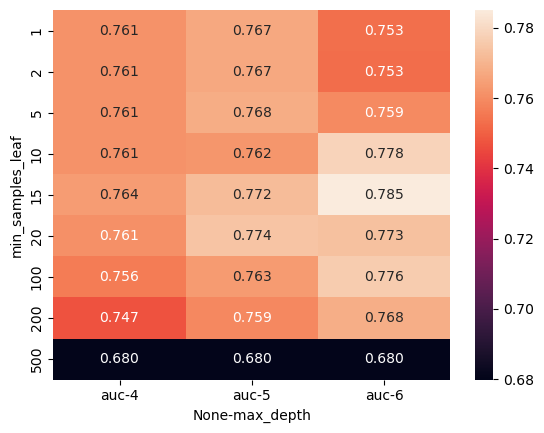

In [71]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

So this is how we do paramter tuning, first we do the max_depth, then we do min_samples_leaf.

Let's now try and find the final decision tree.

In [72]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [73]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- amount <= 525.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  525.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 6.6 Ensembles and random forest

- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In this lesson we talk about random forest as a way of putting multiple decision trees together.

In **Random forest**, each model ('random model') gets a random subset of features.

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [99]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [100]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

if we train our model again and repeat it, we should keep getting different results, if we don't set the random state. For reproducibility it is important to fix the random seed. If we don't this our results will be different each time we run this.

Let's see first how the performance of our model changes, when we change the `n_estimators` parameter.

In [101]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [102]:
scores

[(10, 0.7744726453706618),
 (20, 0.8035316412777603),
 (30, 0.8150747136179797),
 (40, 0.8156862270228379),
 (50, 0.8170818095953114),
 (60, 0.8164581870141193),
 (70, 0.8173209658279045),
 (80, 0.8163068223099464),
 (90, 0.8168244895982175),
 (100, 0.8175994768835824),
 (110, 0.8175268218255793),
 (120, 0.8179385338209295),
 (130, 0.8182533724056089),
 (140, 0.818102007701436),
 (150, 0.8172695018284857),
 (160, 0.8179809159380979),
 (170, 0.8176055314717492),
 (180, 0.8174632486498269),
 (190, 0.817980915938098),
 (200, 0.8190495507495582)]

In [105]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


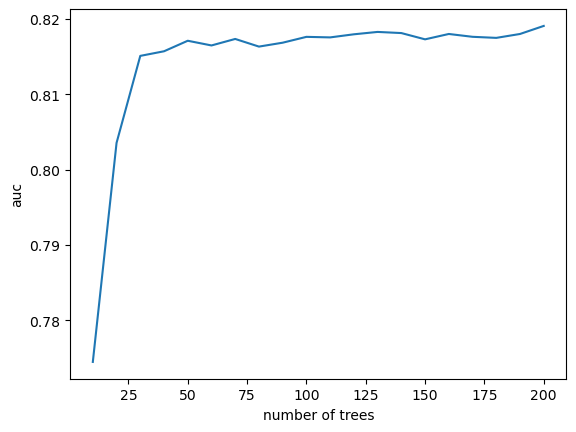

In [109]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

Here, after 50 trees performance is not improving.

Like in decision trees, for random forest also we can tune parameters. What we can tune here is exactl the same as in decision trees. We are interested in `max_depth` and `min_samples_leaf` parameter. Let's now train random forest for different depth parameters.

In [110]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth =d, 
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [114]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


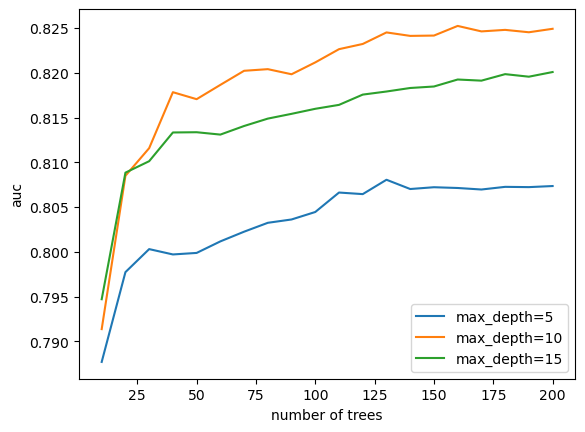

In [116]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

Value of depth matters and 10 is the best one.

For this dataset, value of depth as `10`seems to be the best one.

Now let's check what is the best min_samples_leaf parameter. We'll do it same way.

In [117]:
max_depth = 10
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth =max_depth, 
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [119]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


In [122]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

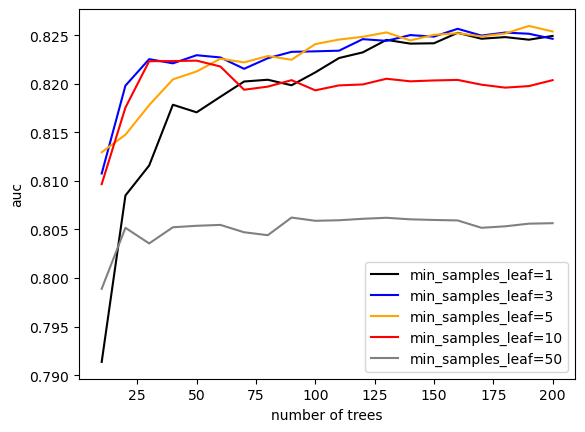

In [123]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color = col, 
             label='min_samples_leaf=%d' % s)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

In [126]:
min_samples_leaf = 3
max_depth = 10

Let's retrain a model with the best parameter values.

In [129]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth = max_depth,
                            min_samples_leaf = min_samples_leaf,
                            random_state=1,
                            n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

This is our final random forest model.

**other useful parameters:**

- `max_features`
- `bootstrap`

[https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

We have seen in this lesson:
- talked about why it's a good idea to have multiple models (an ensemble)
- random forest = multiple different decision trees into one ensemble
- we trained a random forest model
- 

End of video : [ML Zoomcamp 6.6 - Ensemble Learning and Random Forest](https://www.youtube.com/watch?v=FZhcmOfNNZE&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=62)

## 6.7 Gradient boosting and XGBoost

Here we'll talk about a different way of combining decision trees. In previous lesson, the trees that we trained were independent from each other. We can train them in parallel. But there is a different way of train our models, when we train them sequently on after another and each model corrects the errors of previous model. This way of combining models is called **boosting** and we'll talk about one particular way of boosting : **gradient boosting**. We'll use **XGBoost** which is a librrary for implementing gradient boosting algorithm.

- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

start of video : [ML Zoomcamp 6.7 - Gradient Boosting and XGBoost](https://www.youtube.com/watch?v=xFarGClszEM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=63)

In [130]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [131]:
import xgboost as xgb

In [132]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [133]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [136]:
y_pred = model.predict(dval)

In [137]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

**Note:** XGBoost is also quite prone to overfitting. We have to be careful.

In [138]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [141]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [143]:
print(output.stdout)

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81787
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99992	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99998	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

In [145]:
line =s.split('\n')[0]
line

'[0]\ttrain-auc:0.86300\tval-auc:0.76818'

In [146]:
line.split('\t')

['[0]', 'train-auc:0.86300', 'val-auc:0.76818']

In [147]:
num_iter, train_auc, val_auc = line.split('\t')

In [148]:
num_iter

'[0]'

In [150]:
int(num_iter.strip('[]'))

0

In [151]:
train_auc

'train-auc:0.86300'

In [154]:
train_auc.split(':')

['train-auc', '0.86300']

In [156]:
float(train_auc.split(':')[1])

0.863

In [157]:
float(val_auc.split(':')[1])

0.76818

In [161]:
s = output.stdout
s.split('\n')[:10]

['[0]\ttrain-auc:0.86300\tval-auc:0.76818',
 '[5]\ttrain-auc:0.92863\tval-auc:0.80606',
 '[10]\ttrain-auc:0.95002\tval-auc:0.81558',
 '[15]\ttrain-auc:0.96558\tval-auc:0.81680',
 '[20]\ttrain-auc:0.97316\tval-auc:0.81775',
 '[25]\ttrain-auc:0.98174\tval-auc:0.81878',
 '[30]\ttrain-auc:0.98772\tval-auc:0.81787',
 '[35]\ttrain-auc:0.99180\tval-auc:0.81510',
 '[40]\ttrain-auc:0.99456\tval-auc:0.81387',
 '[45]\ttrain-auc:0.99596\tval-auc:0.81462']

In [162]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [163]:
parse_xgb_output(output)

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775
5,25,0.98174,0.81878
6,30,0.98772,0.81787
7,35,0.99180,0.81510
8,40,0.99456,0.81387
9,45,0.99596,0.81462


In [164]:
df_score = parse_xgb_output(output)

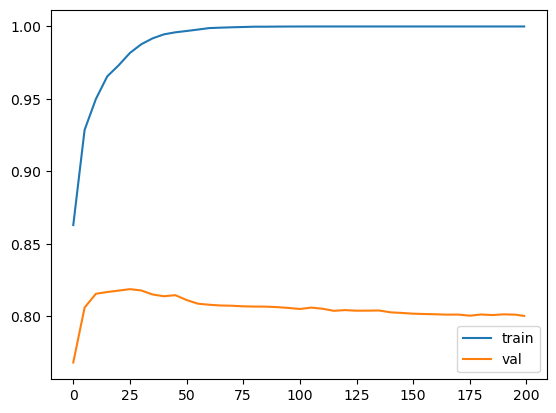

In [165]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

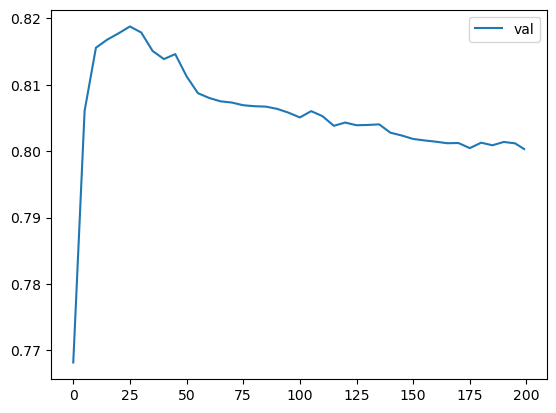

In [166]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

end of video: [ML Zoomcamp 6.7 - Gradient Boosting and XGBoost](https://www.youtube.com/watch?v=xFarGClszEM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=63)

start of video: [ML Zoomcamp 6.8 - XGBoost Parameter Tuning](https://www.youtube.com/watch?v=VX6ftRzYROM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=64)

## 6.8 XGBoost parameter tuning

Tuning the following parameters:

- `eta`

- `max_depth`

- `min_child_weight`